# Airbnb (New York City) Price Prediction

*Í≥ºÏ†ú
- EDA
- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Î®∏Ïã†Îü¨Îãù(ÌöåÍ∑Ä) Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥†, ÏòàÏ∏°  

*Í∞úÏöî 
- ÎØ∏Íµ≠ NYC Airbnb Î™©Î°ù(2019)
- ÌîÑÎ°úÏ†ùÌä∏ Î™©Ï†Å: Í∞ÄÍ≤© ÏòàÏ∏°(price)
- Ï†úÍ≥µ Îç∞Ïù¥ÌÑ∞(3Í∞ú): train.csv, test.csv, y_test(ÏµúÏ¢Ö Ï±ÑÏ†êÏö©)
- ÌèâÍ∞Ä Î∞©Ïãù: MSE (ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®/ Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í Ï∞®Ïù¥ ->Ï†úÍ≥±Ìï¥ ÌèâÍ∑†)
- <Ï∞∏Í≥†> : 6. ÏßÄÎèÑÌïôÏäµ(ÌöåÍ∑Ä) ÎÖ∏ÎìúÏùò 6-8. ÌèâÍ∞Ä(ÌöåÍ∑Ä) Ïä§ÌÖùÏóêÏÑú Î≥µÏäµÌïòÏã§ Ïàò ÏûàÏäµÎãàÎã§.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

# 1. EDA
## Îç∞Ïù¥ÌÑ∞Í∞Ä Ïñ¥ÎñªÍ≤å ÏÉùÍ≤ºÎäîÏßÄ ÏÇ¥Ìé¥Î≥∏Îã§.

In [3]:
# Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ (train ÏóêÎäî targetÍ∞íÏù¥ ÌïòÎÇò Îçî Ï∂îÍ∞ÄÎèºÏûàÏñ¥ÏÑú Ïó¥Ïù¥ ÌïòÎÇò Îçî ÏûàÏùå)
train.shape, test.shape

((39116, 16), (9779, 15))

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå (displayÎ•º Ïì∞Î©¥ ÎèôÏãúÏóê ÌôïÏù∏Ìï† Ïàò ÏûàÎã§)
display(train.head(2))
display(test.head(2))

id                                            name   host_id  \
0  14963583          Room in South Harlem near Central Park  94219511   
1   9458704  Large 1BR Apartment, near Times Sq (2nd Floor)  49015331   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0    Gilles           Manhattan          Harlem  40.80167  -73.95781   
1     Iradj           Manhattan  Hell's Kitchen  40.76037  -73.99016   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     70               3                  3  2019-01-01   
1  Entire home/apt    240               2                 64  2019-06-30   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.09                               2                 0  
1               1.68                               2               262

id                                               name   host_id  \
0  30913224  Cozy and Sunny Room Williamsburg, Luxury Building  33771081   
1    971247                   Sunny Artist Live/Work Apartment   5308961   

  host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0      R√©my            Brooklyn     Williamsburg  40.70959  -73.94652   
1     Larry           Manhattan  Upper West Side  40.79368  -73.96487   

         room_type  minimum_nights  number_of_reviews last_review  \
0     Private room               3                  2  2019-05-08   
1  Entire home/apt               3                159  2019-07-03   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.31                               1                 0  
1               2.09                               1               244

## Îç∞Ïù¥ÌÑ∞Î≥Ñ ÏàòÏπòÌòï/ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ Ï¢ÖÎ•òÎ•º ÌôïÏù∏ÌïúÎã§

In [5]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [6]:
train.select_dtypes(include=['int64', 'float64']).columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [7]:
train.select_dtypes(include=['object']).columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

> Ïó¨Í∏∞ÏÑú last_review Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥†, ÏµúÍ∑º Î¶¨Î∑∞Í∞Ä ÏûàÏúºÎ©¥ Í∞ÄÍ≤©Ïù¥ Îçî ÎÜíÎã§, Ïù¥Îü∞ ÏãùÏúºÎ°ú Ïó∞Í≤∞ÏßÄÏùÑ Ïàò ÏûàÏùÑ Í±∞ Í∞ôÏßÄÎßå, Í≤∞Ï∏°ÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ Ï†úÏô∏Ìï¥Î≤ÑÎ¶¨Îäî ÏπºÎüºÏù¥ ÎêòÏóàÎã§.

## Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥ÎäîÎç∞, ÏûàÎã§. Ï≤òÎ¶¨Ìï¥Ï§ÄÎã§.

In [8]:
# Í≤∞Ï∏°Ïπò(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [9]:
# Í≤∞Ï∏°Ïπò(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [10]:
# Í≤∞Ï∏°Ïπò Ïª¨Îüº ÏÇ≠Ï†ú(last_review)
train.drop(['id', 'name', 'host_name','last_review'], axis=1, inplace=True)
test.drop(['id', 'name', 'host_name','last_review'], axis=1, inplace=True)

In [11]:
# Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [12]:
train.dropna(how='any', inplace=True)
train.dropna(how='any', inplace=True)

## Í∞ÄÍ≤©Ïùò Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÎã§. Îß§Ïö∞ ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥êÏûàÎã§. Ïù¥Í≤ÉÎèÑ Î°úÍ∑∏Ï≤òÎ¶¨ Ìï¥Ï£ºÏûê.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

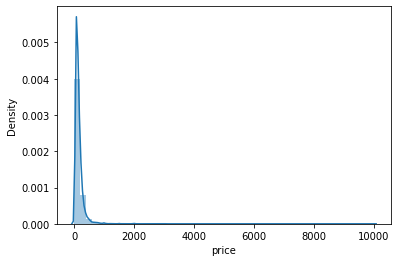

In [13]:
# target(hist)
sns.distplot(train['price'], kde=True, bins=50)

In [14]:
print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

Skewness: 19.428985
Kurtosis: 597.221101


- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.

In [15]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [16]:
# ÌîºÏ≤ò(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [17]:
train.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

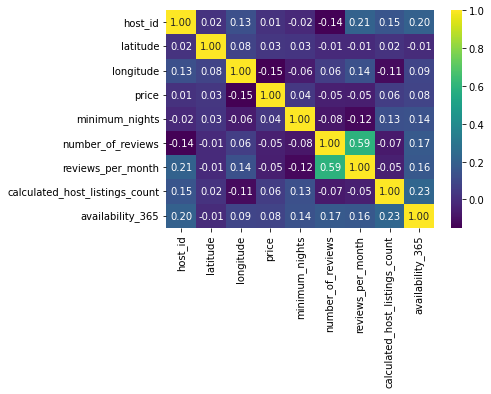

In [18]:
#ÌÅ¨Í≤å Í¥ÄÎ†®ÏûàÏñ¥ Î≥¥Ïù¥Îäî Ïï†Í∞Ä ÏóÜÎã§

corr_df = train.corr()
sns.heatmap(corr_df, annot= True, fmt='.2f', cmap='viridis')
train.columns

### ÏàòÏπòÌòï ÌîºÏ≤òÎäî Ïù¥Îü∞ Í≤å ÎÇ®ÏïòÎã§

In [19]:
num_col = train.select_dtypes(include=['int64', 'float64']).columns

### Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ÏóêÎäî Ïù¥Îü∞Í≤å ÏûàÎã§. ÏñòÎÑ§Îäî Ïù¥Îî∞Í∞Ä Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ Ìï¥Ï§ÄÎã§

In [20]:
cat_col = train.select_dtypes(include=['object']).columns

In [21]:
train.shape, test.shape

((39116, 12), (9779, 11))

# Visualization

In [22]:
train['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island'],
      dtype=object)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

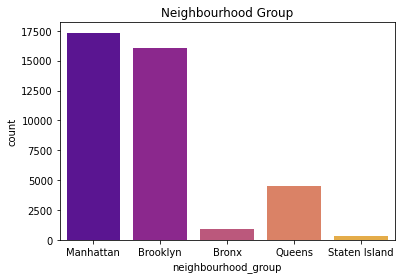

In [23]:
sns.countplot(train['neighbourhood_group'], palette='plasma')
plt.title('Neighbourhood Group')

Text(0, 0.5, 'count')

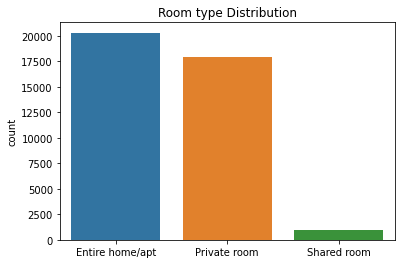

In [24]:
sns.barplot(x=train['room_type'].value_counts().index , y=train['room_type'].value_counts()).set(title='Room type Distribution')
plt.ylabel('count')

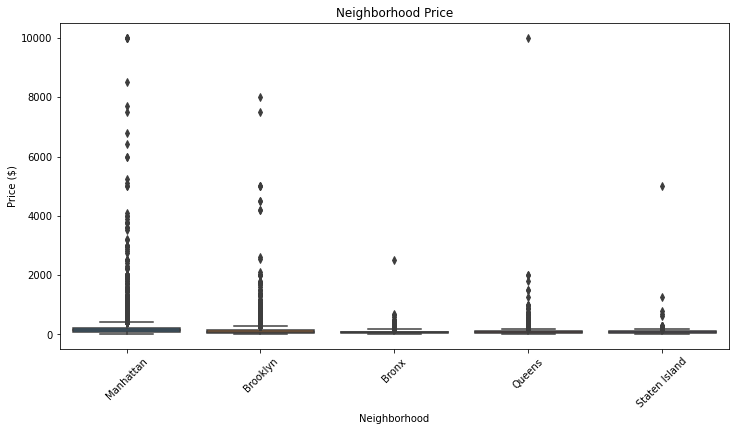

In [25]:
#NeighbourhoodÎ≥Ñ Í∞ÄÍ≤©

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=train)
plt.xticks(rotation=45)  # x Ï∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.title('Neighborhood Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')
plt.show();

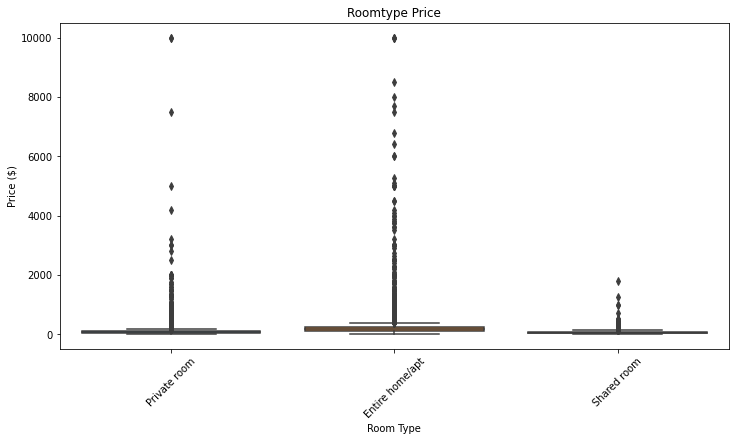

In [26]:
#RoomtypeÎ≥Ñ Í∞ÄÍ≤©

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=train)
plt.xticks(rotation=45)  # x Ï∂ï ÎùºÎ≤® ÌöåÏ†Ñ
plt.title('Roomtype Price')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show();

In [27]:
from wordcloud import WordCloud

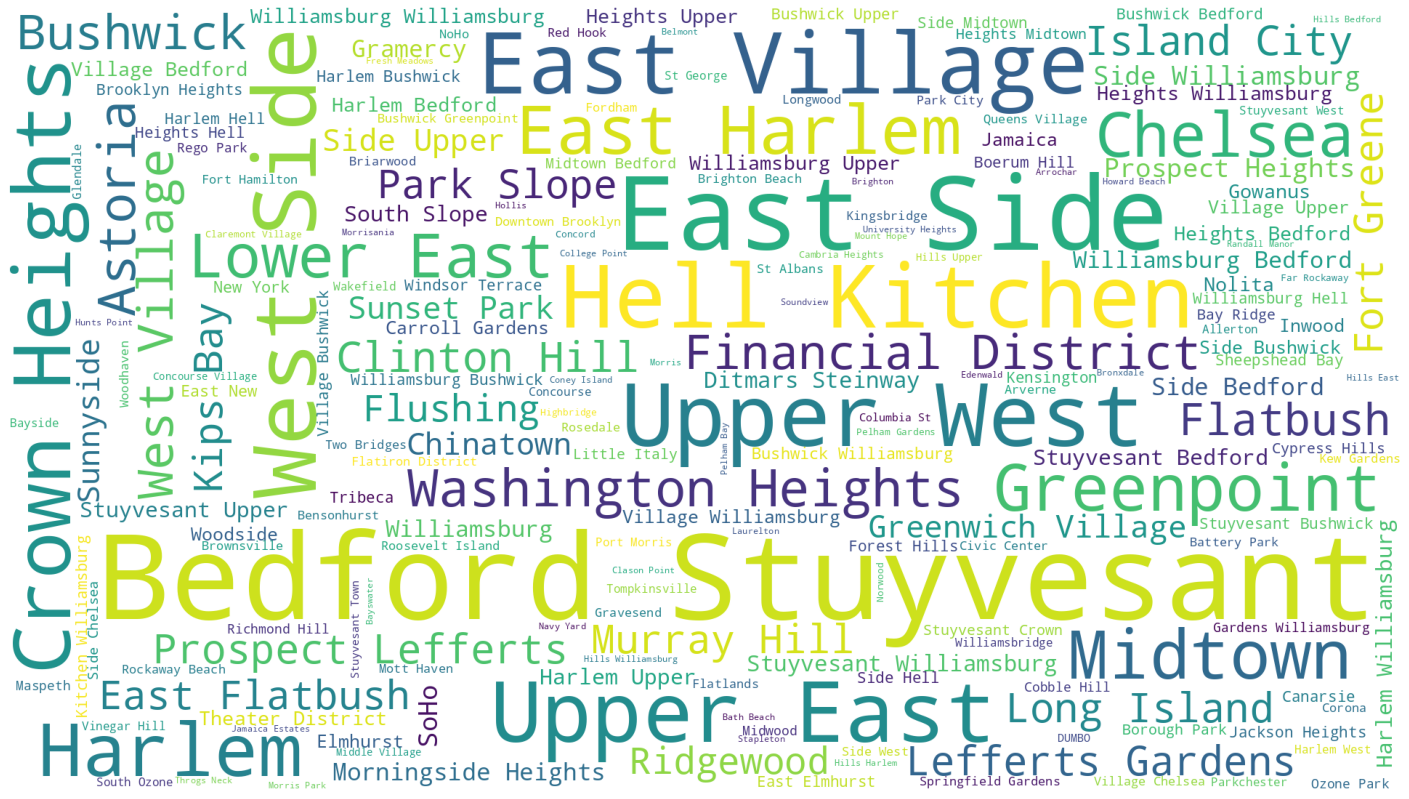

In [28]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(train.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

## 3) ÏàòÏπò Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
- ÏùºÎã® ÏàòÏπòÌôîÎç∞Ïù¥ÌÑ∞Îì§Ïùò priceÏôÄÏùò Í¥ÄÍ≥ÑÎ•º ÌôïÏù∏

## Price

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


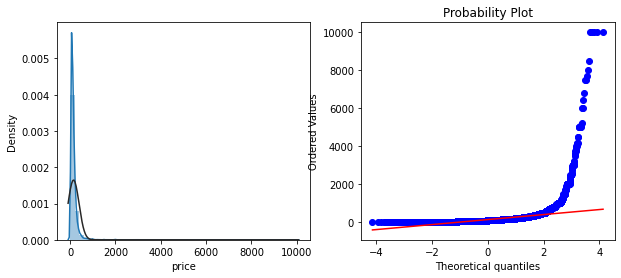

In [29]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax1= sns.distplot(train['price'], fit=norm, ax=axes[0])
ax2 = stats.probplot(train['price'], plot=axes[1])

In [30]:
train['price'] = np.log1p(train['price'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


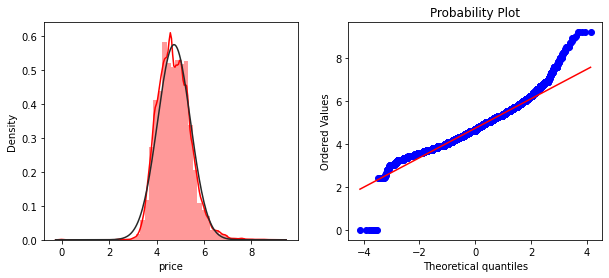

In [31]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax1= sns.distplot(train['price'], fit=norm, ax=axes[0], color ='red')
ax2 = stats.probplot(train['price'], plot=axes[1])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


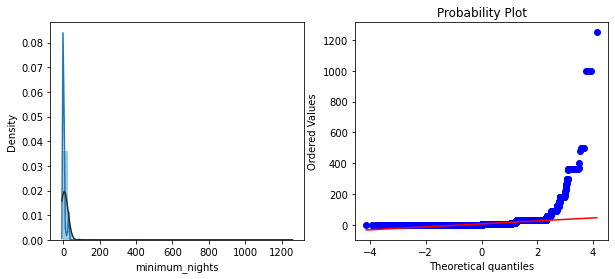

In [32]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax1= sns.distplot(train['minimum_nights'], fit=norm, ax=axes[0])
ax2 = stats.probplot(train['minimum_nights'], plot=axes[1])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


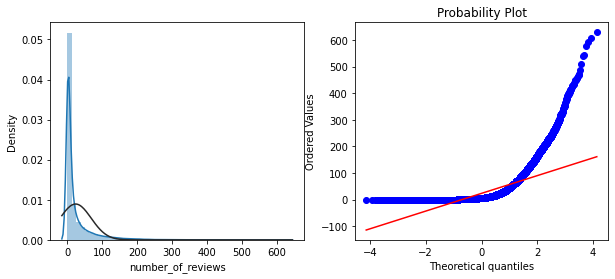

In [33]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax1= sns.distplot(train['number_of_reviews'], fit=norm, ax=axes[0])
ax2 = stats.probplot(train['number_of_reviews'], plot=axes[1])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


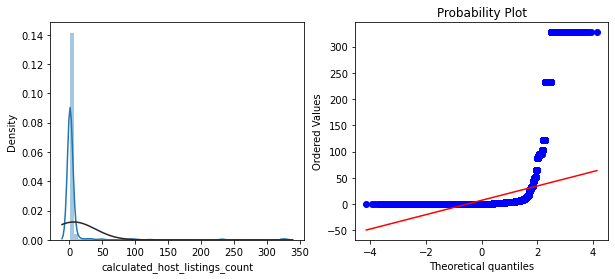

In [34]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax1= sns.distplot(train['calculated_host_listings_count'], fit=norm, ax=axes[0])
ax2 = stats.probplot(train['calculated_host_listings_count'], plot=axes[1])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


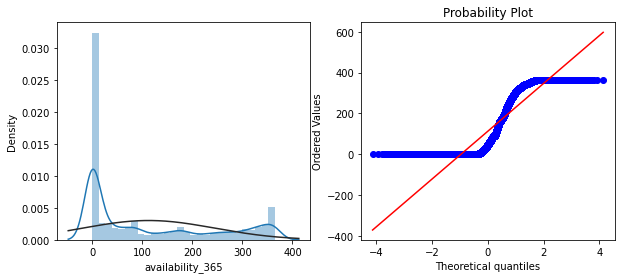

In [35]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
ax1= sns.distplot(train['availability_365'], fit=norm, ax=axes[0])
ax2 = stats.probplot(train['availability_365'], plot=axes[1])

## 3)Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ (Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©)

In [36]:
train.head()

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0  94219511           Manhattan              Harlem  40.80167  -73.95781   
1  49015331           Manhattan      Hell's Kitchen  40.76037  -73.99016   
2    440022           Manhattan        West Village  40.73001  -74.00562   
3   3577509            Brooklyn  Bedford-Stuyvesant  40.69128  -73.93653   
4  12475280            Brooklyn  Bedford-Stuyvesant  40.68899  -73.95555   

         room_type     price  minimum_nights  number_of_reviews  \
0     Private room  4.262680               3                  3   
1  Entire home/apt  5.484797               2                 64   
2  Entire home/apt  5.017280              60                  1   
3  Entire home/apt  4.454347               4                239   
4     Private room  3.806662              28                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.09                               2                 0  
1               1.68                               2               262  
2               0.20                               1                 0  
3               2.89                               2                 1  
4               0.00                               1                 0

In [37]:
# train.drop(['host_id','latitude','longitude'], axis=1, inplace=True)
# test.drop(['host_id','latitude','longitude'], axis=1, inplace=True)

train.drop('host_id', axis=1, inplace=True)
test.drop('host_id', axis=1, inplace=True)

In [38]:
train.shape, test.shape

((39116, 11), (9779, 10))

In [39]:
train.select_dtypes(include=['object']).columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['neighbourhood_group', 'neighbourhood', 'room_type']

for col in cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [41]:
train.head(3)

neighbourhood_group  neighbourhood  latitude  longitude  room_type  \
0                    2             94  40.80167  -73.95781          1   
1                    2             95  40.76037  -73.99016          0   
2                    2            209  40.73001  -74.00562          0   

      price  minimum_nights  number_of_reviews  reviews_per_month  \
0  4.262680               3                  3               0.09   
1  5.484797               2                 64               1.68   
2  5.017280              60                  1               0.20   

   calculated_host_listings_count  availability_365  
0                               2                 0  
1                               2               262  
2                               1                 0

In [42]:
train['price'] = np.expm1(train['price'])

In [43]:
train.shape, test.shape

((39116, 11), (9779, 10))

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

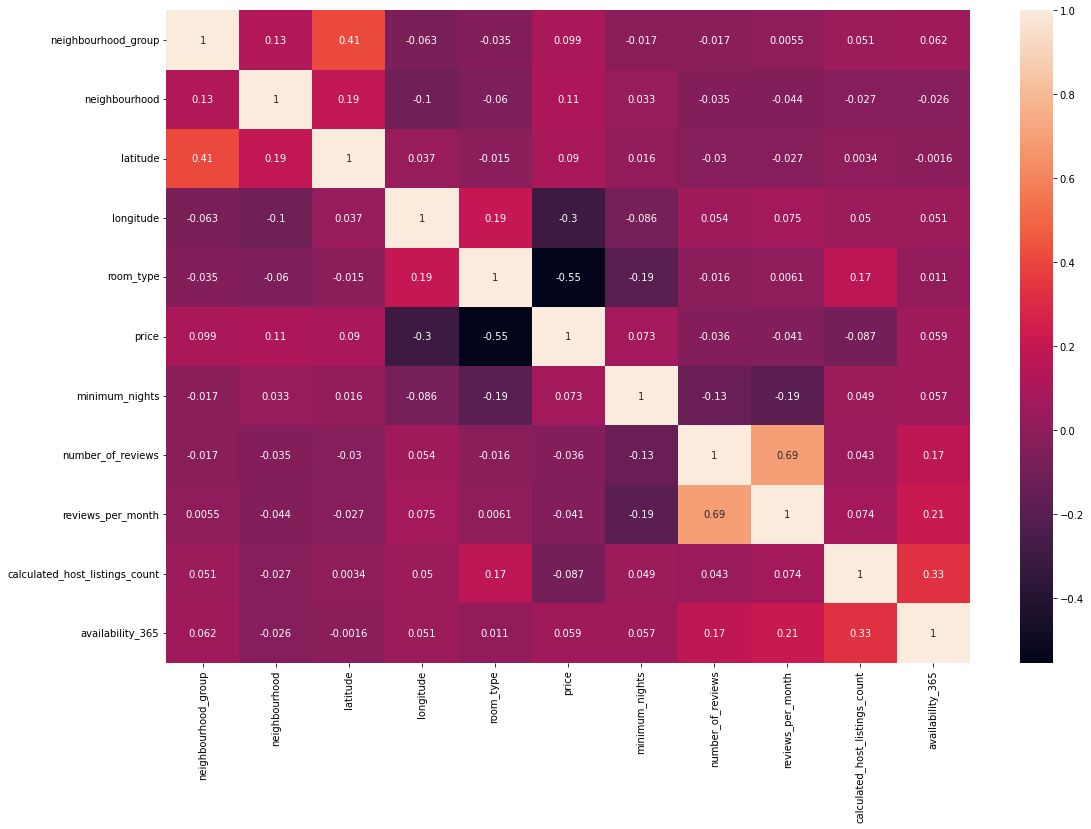

In [44]:
corr = train.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
train.columns

# 3. Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ 
- Train Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏßÄÍ≥† ÌïôÏäµ
- Validation Îç∞Ïù¥ÌÑ∞ ÎÇòÎà†ÏÑú ÏòàÏ∏°

In [45]:
#Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
#Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ÌïòÎäî ÏΩîÎìú (train_test_split) (Ïó¨Í∏∞ÏÑú testÍ∞Ä Í≥ß validationÏù¥ÎùºÏÑú Ìó∑Í∞àÎ¶∞Í±∞Îã§)

X_train, X_val, y_train, y_val = train_test_split(
    train.drop('price',axis=1), train['price'], test_size=0.2, random_state=2022)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 10), (7824, 10), (31292,), (7824,))

## 1) ÏÑ†ÌòïÌöåÍ∑Ä

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
pred = model.predict(X_val)

#ÌèâÍ∞Ä mseÎ°ú Ìï¥Î≥¥Í∏∞ (ÏûëÏùÑÏàòÎ°ù Ï¢ãÎã§)
mean_squared_error(y_val, pred)

29210.072025519297

## 2) Î¶øÏßÄÌöåÍ∑Ä

In [48]:
from sklearn.linear_model import Ridge
model = Ridge()

model.fit(X_train, y_train)
pred = model.predict(X_val)

mean_squared_error(y_val, pred)

29212.084466689805

## 3) ÎùºÏèòÌöåÍ∑Ä

In [49]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)

model.fit(X_train, y_train)
pred = model.predict(X_val)

mean_squared_error(y_val, pred)

29858.342868794647

## 4) ÏóòÎùºÏä§Ìã±ÎÑ∑ ÌöåÍ∑Ä

In [50]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1)

model.fit(X_train, y_train)
pred = model.predict(X_val)

mean_squared_error(y_val, pred)

31317.84623608296

## 5) ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏

In [51]:
from sklearn.ensemble import RandomForestRegressor
model_r = RandomForestRegressor(random_state=2022)

model_r.fit(X_train, y_train)
pred_r = model_r.predict(X_val)

mean_squared_error(y_val, pred_r)

31495.413508282214

## 6) XGBoost

In [52]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)

mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


29603.28926471407

## XGBoostÏóê ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï†ÅÏö©

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
xgb = XGBRegressor()

params = {'learning_rate':[0.07, 0.05],
         'max_depth':[3,5,7],
         'n_estimators':[100, 200],
         'subsample':[0.9, 0.8, 0.7]}


grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1) 
grid.fit(X_train, y_train)
pred = grid.predict(X_val)


# ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best Parameters:", grid.best_params_)

Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.07}


In [65]:
xgb = XGBRegressor(
    learning_rate = 0.07,
    max_depth = 7,
    n_estimators = 200,
    subsample = 0.8)

xgb.fit(X_train, y_train)
pred_x = xgb.predict(X_val)
mean_squared_error(y_val, pred_x)

28561.719695183834

# üí° ÏµúÏ¢Ö ÌÖåÏä§Ìä∏

In [66]:
# test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = xgb.predict(test)
mean_squared_error(y_test, pred)

50425.81293661643

# ÌöåÍ≥†
1. ÎßàÏßÄÎßâÏóê Ìó§Îß∏ÎäîÎç∞, Í∑∏ Ïù¥Ïú†Í∞Ä priceÎßå logÎ•º Ï∑®Ìï¥Ï£ºÍ≥†, Îã§Î•∏ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îì§ÏùÄ Î°úÍ∑∏Î•º Ï∑®Ìï¥Ï£ºÏßÄ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏Ïóê Íº¨Ïó¨ÏÑú mseÍ∞Ä 7ÎßåÏù¥ ÎÑòÍ≤å ÎÇòÏò§Í≥† Ïù¥Îû¨Îã§. Í∑∏ÎûòÏÑú Ïôú Îç∞Ïù¥ÌÑ∞Î•º Îçî ÎßåÏ°åÎçîÎãà Ïò§Ï∞®Í∞Ä Í∑πÏã¨Ìï¥Ï°åÎÇò(?)Î•º Î®∏Î¶¨Î•º Ï•êÏñ¥Ïã∏Í≥† Í≥†ÎØºÌïòÎã§Í∞Ä Íπ®Îã¨ÏïòÎã§. Ìï†Í±∞Î©¥ Îã§ Ìï¥Ï§òÏïºÎêòÎÇòÎ≥¥Îã§. 
2. EDAÎäî Ïû¨ÎØ∏ÏûàÎã§. ÏàòÏπòÌòï/Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏ÌïòÍ≥†, Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Í∞Ä targetÍ∞íÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎÅºÏπ†ÏßÄ ÌÉêÏÉâÌïòÎäî Í≥ºÏ†ïÏù¥ Ïû¨ÎØ∏ÏûàÎã§. 
3. Í∞ôÏùÄ Airbnb Ï∫êÍ∏Ä Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥†, ÏûòÌïú ÏÇ¨ÎûåÎì§ ÏΩîÎìú ÌïÑÏÇ¨Î•º Ìï¥Î≥¥Î©¥ÏÑú machine learning flowÎ•º Îçî ÏàôÏßÄÌï¥ÏïºÍ≤†Îã§. validation Ïù¥Îûë testÎùºÎäî Ïö©Ïñ¥Í∞Ä Ï¢ÖÏ¢Ö ÌòºÏö©ÎêòÏñ¥ ÏÇ¨Ïö©ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê Ìó∑Í∞àÎ¶¨Í∏∞ ÏâΩÎã§Îäî Í≤ÉÎèÑ Î∞∞Ïõ†Îã§. 'Îç∞Ïù¥ÌÑ∞Î•º ÎèÑÎåÄÏ≤¥ Î™á Î≤àÏùÑ Ï™ºÍ∞úÎäîÍ±∞Ïïº' ÌïòÎ©¥ÏÑú ÌòºÎèàÏúº Ïπ¥Ïò§Ïä§Ïóê Îπ†Ï°åÎäîÎç∞, Ïù¥Ï†ú Ï¢Ä Í∞êÏù¥ Ïû°ÌûåÎã§.
4. train, validation, testÎ°ú ÎÇòÎàÑÍ≥† / train,test Îç∞Ïù¥ÌÑ∞Î•º Î®ºÏ†Ä Ï†ÑÏ≤òÎ¶¨Î•º ÎèôÏùºÌïòÍ≤å ÏßÑÌñâÌï¥Ï£ºÏñ¥Ïïº ÌïòÍ≥† / train Îç∞Ïù¥ÌÑ∞Î•º X,y, train, validationÎç∞Ïù¥ÌÑ∞Î°ú Ï¥ù 4Í∞úÎ°ú Ï™ºÍ∞úÏÑú / Í∑∏Í±∏ Í∞ÄÏßÄÍ≥† Î™®Îç∏Ïóê fit, transform, predictÎ•º Ìï¥ÏÑú Î™®Îç∏Ïù¥ Ïûò ÏÉùÍ≤®Î®πÏóàÎäîÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≥† / Í∑∏ Îã§Ïùå ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú test Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† Î™®Îç∏ÏùÑ ÎèåÎ†§Î¥êÏÑú ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Í∞íÏùÑ Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄ ÌôïÏù∏ÌïúÎã§. (Îî∞ÎùºÏÑú, testÎç∞Ïù¥ÌÑ∞ÏóêÎäî targetÏó¥Ïù¥ ÌïòÎÇò Îπ†Ï†∏ÏûàÎã§)
5. Í∑∏ÎûòÎèÑ Ï∞îÎÅî(?) MSEÍ∞Ä Îçî ÎÇ¥Î†§Í∞îÎã§. Ï£ºÎßêÎèôÏïà ÌååÎùºÎØ∏ÌÑ∞Î•º Ïñ¥ÎñªÍ≤å Ïûò engineeringÌï† Ïàò ÏûàÏùÑÏßÄ Îçî Í≥†ÎØºÌï¥Î≥¥Í≤†Îã§.